### Name: Dillon Pullano

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [ ]:
import yellowbrick.datasets as YBD
import sklearn
import numpy as np
import pandas as pd

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [ ]:
# Import spam dataset from yellowbrick library
X, y = YBD.loaders.load_spam(data_home=None, return_dataset=False)

# Print size, shape, and type of X
print("\nThe size of X is: " + str(X.size))
print("\nThe shape of X is: " + str(X.shape))
print("\nThe type of X is: " + str(type(X)))
print("\nThe type of X's attributes are:")
print(str(X.dtypes))   # This would be used if we want to see all the types for each column in the dataframe X

# Print size, shape, and type of y
print("\nThe size of y is: " + str(y.size))
print("\nThe shape of X is: " + str(y.shape))
print("\nThe type of y is: " + str(y.dtypes))


The size of X is: 262200

The shape of X is: (4600, 57)

The type of X is: <class 'pandas.core.frame.DataFrame'>

The type of X's attributes are:
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000    

### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [ ]:
# Check if there are any missing values and fill them in if necessary
print("\nThe following is the count of values that are NA from the columns of X:\n")
print(X.isna().sum())   # There are no missing values from X

print("\nThe following is the count of values that are NA from y:\n")
print(y.isna().sum())   # There are no missing values from y

print("\nThankfully there are no missing values in the dataset!")


The following is the count of values that are NA from the columns of X:

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [ ]:
# Create X_small and y_small
X_garbage, X_small, y_garbage, y_small = sklearn.model_selection.train_test_split(X, y, test_size = 0.05, random_state = 0)

# Print the size and shape of X_small
print("\nThe size of X_small is: " + str(X_small.size))
print("\nThe shape of X_small is: " + str(X_small.shape))

# Print the size and shape of y_small
print("\nThe size of y_small is: " + str(y_small.size))
print("\nThe shape of y_small is: " + str(y_small.shape))


The size of X_small is: 13110

The shape of X_small is: (230, 57)

The size of y_small is: 230

The shape of y_small is: (230,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets:
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a model with maximum 2000 iterations
reg_model = LogisticRegression(max_iter = 2000)


In [ ]:
# Implement model on X and y
reg_model_1 = reg_model

# Create training and testing datasets
X_train_1, X_test_1, y_train_1, y_test_1 = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the model using the training datasets
reg_model_1.fit(X_train_1, y_train_1)

# Run the model to make test predictions
predictions_1 = reg_model_1.predict(X_test_1)
train_predictions_1 = reg_model_1.predict(X_train_1)   # Needed for next accuracy component of assignment


In [ ]:
# Implement model on first 2 columns of X and y
reg_model_2 = reg_model

# Create version of X that only contains the first 2 columns
X_first2 = X.iloc[:, 0:2]

# Create training and testing datasets
X_train_2, X_test_2, y_train_2, y_test_2 = sklearn.model_selection.train_test_split(X_first2, y, test_size = 0.2, random_state = 0)

# Train the model using the training datasets
reg_model_2.fit(X_train_2, y_train_2)

# Run the model to make test predictions
predictions_2 = reg_model_2.predict(X_test_2)
train_predictions_2 = reg_model_2.predict(X_train_2)   # Needed for next accuracy component of assignment


In [ ]:
# Implement model on X_small and y_small
reg_model_3 = reg_model

# Create training and testing datasets
X_train_3, X_test_3, y_train_3, y_test_3 = sklearn.model_selection.train_test_split(X_small, y_small, test_size = 0.2, random_state = 0)

# Train the model using the training datasets
reg_model_3.fit(X_train_3, y_train_3)

# Run the model to make test predictions
predictions_3 = reg_model_3.predict(X_test_3)
train_predictions_3 = reg_model_3.predict(X_train_3)   # Needed for next accuracy component of assignment


### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

In [ ]:
# import accuracy score metrics
from sklearn.metrics import accuracy_score

# Calculate training and validation accuracy for model 1 (X and y)
score1_training = accuracy_score(y_train_1, train_predictions_1)
score1_validation = accuracy_score(y_test_1, predictions_1)

# Output accuracy scores for model 1
print("\nThe training accuracy for the first model (X and y) is: " + str(score1_training))
print("The validation accuracy for the first model (X and y) is: " + str(score1_validation))



The training accuracy for the first model (X and y) is: 0.9269021739130435
The validation accuracy for the first model (X and y) is: 0.9369565217391305


In [ ]:
# Calculate training and validation accuracy for model 2 (first 2 rows of X and y)
score2_training = accuracy_score(y_train_2, train_predictions_2)
score2_validation = accuracy_score(y_test_2, predictions_2)

# Output accuracy scores for model 2
print("The training accuracy for the second model (first 2 columns of X and y) is: " + str(score2_training))
print("The validation accuracy for the second model (first 2 columns of X and y) is: " + str(score2_validation))


The training accuracy for the second model (first 2 columns of X and y) is: 0.6149456521739131
The validation accuracy for the second model (first 2 columns of X and y) is: 0.5934782608695652


In [ ]:
# Calculate training and validation accuracy for model 3 (X_small and y_small)
score3_training = accuracy_score(y_train_3, train_predictions_3)
score3_validation = accuracy_score(y_test_3, predictions_3)

# Output accuracy scores for model 3
print("The training accuracy for the third model (X_small and y_small) is: " + str(score3_training))
print("The validation accuracy for the third model (X_small and y_small) is: " + str(score3_validation))


The training accuracy for the third model (X_small and y_small) is: 0.9565217391304348
The validation accuracy for the third model (X_small and y_small) is: 0.8043478260869565


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# Create Dataframe with column headers
col_names = ['Data Size', 'Training Accuracy', 'Validation Accuracy']
results = pd.DataFrame(columns = col_names)

# Create individual tuples of data to be inserted into results Dataframe
model_result_1 = [X.size, score1_training, score1_validation]
model_result_2 = [X_first2.size, score2_training, score2_validation]
model_result_3 = [X_small.size, score3_training, score3_validation]

# Append tuples into Dataframe
results.loc[len(results)] = model_result_1
results.loc[len(results)] = model_result_2
results.loc[len(results)] = model_result_3

# Print results
print(results)

   Data Size  Training Accuracy  Validation Accuracy
0   262200.0           0.926902             0.936957
1     9200.0           0.614946             0.593478
2    13110.0           0.956522             0.804348


### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

Answers:
1. When the original dataset was used, there was a training accuracy of 0.928 and a validation accuracy of 0.936. When the smaller dataset (5%) was used, the training accuracy increased slightly to 0.957 while the validation accuracy dropped to 0.804. This decrease in validation accuracy makes sense. Since the 5% model was trained with less data, it is less likely to correctly classify variations in the data. When the dataset was truncated so that only the first 2 attributes in X were used to train the model, both the training and validation accuracies plummetted to 0.615 and 0.593, respectively. This makes sense since it is likely we are cutting out very useful attributes by removing most of the dataset.

2. In the case of this dataset (identifying spam), a false positive represents a non-spam (important) email being incorrectly classified as spam. A false negative represents a spam email being incorrectly classified as a non-spam (important) email. The first case (false positive) is worse in a working scenario. In cases where a false positive has occured, important emails that should be delivered to an inbox are sent to junk mail or blocked completely. This could result in important information not being communicated. However, in cases where the less serious scenario (false negative) has occured, a single junk email will be delivered to an inbox. Most issues that could arise from this junk email being allowed into an inbox can be avoided with proper employee training.  



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


Answers:

1. All code was written by me. Code was sourced by looking at work that was completed during older lab sessions. Official Numpy, Sklearn, and Pandas documentation sources were used in conjunction with ChatGPT to clarify how to use functions that were unknown to me.
2. The steps were completed as follows;
     - First, the correct modules were imported to use sklearn (logisticRegression, metrics, etc.).
     - Second, the dataset was loaded in and processed to ensure that there are no null values.
     - Third, a (5%) subsection of the dataset was created, along with another dataset containing only the first 2 attributes of X, and the final training and testing datasets were created.
     - Fourth, the models were fit using the training data and predictions were made using the training and testing data.
     - Fifth, accuracy scores were calculated for training and validation datasets.
     - Sixth, results were compiled into a DataFrame and displayed.

3. The challenge that I had with this part of the assignment was getting used to using the sklearn functions 'train_test_split', 'LogisticRegression', and 'accuracy_score'. I was able to reference jupyter notebooks from our previous lab sessions to help with some of the processes. Where we hadn't gone through topics in previous labs, I found that referencing the official documentation was the most useful in getting through the assignment.

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [ ]:
# Import spam dataset from yellowbrick library
X, y = YBD.loaders.load_concrete(data_home=None, return_dataset=False)

# Print size, shape, and type of X
print("\nThe size of X is: " + str(X.size))
print("\nThe shape of X is: " + str(X.shape))
print("\nThe type of X is: " + str(type(X)))
print("\nThe type of X's attributes are:")
print(str(X.dtypes))   # This would be used if we want to see all the types for each column in the dataframe X

# Print size, shape, and type of y
print("\nThe size of y is: " + str(y.size))
print("\nThe shape of y is: " + str(y.shape))
print("\nThe type of y is: " + str(y.dtypes))


The size of X is: 8240

The shape of X is: (1030, 8)

The type of X is: <class 'pandas.core.frame.DataFrame'>

The type of X's attributes are:
cement    float64
slag      float64
ash       float64
water     float64
splast    float64
coarse    float64
fine      float64
age         int64
dtype: object

The size of y is: 1030

The shape of y is: (1030,)

The type of y is: float64


### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [ ]:
# Check if there are any missing values and fill them in if necessary
print("\nThe following is the count of values that are NA from the columns of X:\n")
print(X.isna().sum())   # There are no missing values from X

print("\nThe following is the count of values that are NA from y:\n")
print(y.isna().sum())   # There are no missing values from y

print("\nThankfully there are no missing values in the dataset!")


The following is the count of values that are NA from the columns of X:

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64

The following is the count of values that are NA from y:

0

Thankfully there are no missing values in the dataset!


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`.
3. Implement the machine learning model with `X` and `y`

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiate a model
lin_model = LinearRegression()

# Create training and testing datasets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the model using the training datasets
lin_model.fit(X_train, y_train)

# Run the model to make test predictions
predictions = lin_model.predict(X_test)
train_predictions = lin_model.predict(X_train)   # Needed for next accuracy component of assignment



### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [ ]:
# import accuracy metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate training accuracy with MSE and R2
MSE_training = mean_squared_error(y_train, train_predictions)
R2_training = r2_score(y_train, train_predictions)

# Calculate validation accuracy with MSE and R2
MSE_validation = mean_squared_error(y_test, predictions)
R2_validation = r2_score(y_test, predictions)

# Output accuracy results
print("\nThe training accuracy MSE is " + str(MSE_training) + " and R2 is " + str(R2_training))
print("\nThe validation accuracy MSE is " + str(MSE_validation) + " and R2 is " + str(R2_validation))


The training accuracy MSE is 110.34550122934108 and R2 is 0.6090710418548884

The validation accuracy MSE is 95.63533482690434 and R2 is 0.636898110341124


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# Create column and index headers
col_names = ['Training Accuracy', 'Validation Accuracy']
index_names = ['MSE Score', 'R2 Score']

# Create the DataFrame with the headers
results = pd.DataFrame(columns = col_names, index = index_names)

# Add the accuracy results into the results DataFrame and print results
results.iloc[0,0] = MSE_training
results.iloc[0,1] = MSE_validation
results.iloc[1,0] = R2_training
results.iloc[1,1] = R2_validation

print(results)


          Training Accuracy Validation Accuracy
MSE Score        110.345501           95.635335
R2 Score           0.609071            0.636898


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Answer:

1. Using a linear model produced less than ideal results. The R2 scores were 0.609 and 0.637 for the training and validation accuracies, respectively. This is low, since we would hope to be able to achieve something in the high 90's range instead of the low 60's. This suggests that this data might be better modelled using non-linear methods.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answers:

1. All code was written by me. Code was sourced by looking at work that was completed during older lab sessions. Official Matplotlib, Numpy, Sklearn, and Pandas documentation sources were used in conjunction with ChatGPT to clarify how to use functions that were unknown to me.
2. The steps were completed as follows;
     - First, the dataset was loaded in and processed to ensure that there are no null values.
     - Second, the LinearRegression model was imported from sklearn and an instance was instantiated with default parameters. MSE and R2 functions were imported.
     - Third, the training and testing datasets were created and the LinearRegression model was fit to the training data.
     - Fourth, predictions were made using the training and testing data.
     - Fifth, MSE and R2 accuracy scores were calculated for training and validation datasets.
     - Sixth, results were compiled into a DataFrame and displayed.

3. The challenge that I had with this part of the assignment was similar to that of that first part; getting used to using the sklearn functions 'LinearRegression', 'mean_squared_error', and 'r2_score'. I was able to reference jupyter notebooks from our previous lab sessions to help with some of the processes.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


I noticed that limiting the number of X parameters that were used during training in part 1 of the assignment seemed to have a larger effect on results than reducing the data size to 5% while keeping all X parameters. When the size was reduced by 95% but all parameters were considered, the training accuracy more or less stayed the same while the testing accuracy dropped by about 13%. When compared to the model that only used 2 X parameters, the training and validation dropped over 30%. This is similar to what was discussed in class. This suggests that the amount of parameters describing X can have more of an effect on a model than the scale of the data used.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I liked how this lab allowed me to go through and understand the general steps required to implement linear machine learning models. The bonus section really helped me understand the processes since I repeated it for 12 tests (6 ridge and 6 lasso). What I found that was confusing was which accuracy measure I was supposed to use for part 1. I used 'accuracy_score' but some other students used 'cross_validation' which produced similar, but different results.

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

In [ ]:
# Import required functions from sklearn
from sklearn.linear_model import Ridge, Lasso              # Ridge and Lasso models
from sklearn.model_selection import train_test_split       # Function needed for splitting datasets
from sklearn.metrics import mean_squared_error, r2_score   # Functions needed for validation metrics

# Import concrete dataset from yellowbrick library
X, y = YBD.loaders.load_concrete(data_home=None, return_dataset=False)

# Process data to ensure there are no missing values. If there are, these values need to be filled in or dealt with.
    # This has already been completed during Part 2 of this assignment or it would be completed here

# Create the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Instantiate different Ridge models that are to be used
ridge_model_1 = Ridge(alpha = 0.001, )
ridge_model_2 = Ridge(alpha = 0.01)
ridge_model_3 = Ridge(alpha = 0.1)
ridge_model_4 = Ridge(alpha = 1)
ridge_model_5 = Ridge(alpha = 10)
ridge_model_6 = Ridge(alpha = 100)

# Instantiate different Lasso models that are to be used
lasso_model_1 = Lasso(alpha = 0.001)
lasso_model_2 = Lasso(alpha = 0.01)
lasso_model_3 = Lasso(alpha = 0.1)
lasso_model_4 = Lasso(alpha = 1)
lasso_model_5 = Lasso(alpha = 10)
lasso_model_6 = Lasso(alpha = 100)


In [ ]:
# Fit the models using the training data
ridge_model_1.fit(X_train, y_train)
ridge_model_2.fit(X_train, y_train)
ridge_model_3.fit(X_train, y_train)
ridge_model_4.fit(X_train, y_train)
ridge_model_5.fit(X_train, y_train)
ridge_model_6.fit(X_train, y_train)
lasso_model_1.fit(X_train, y_train)
lasso_model_2.fit(X_train, y_train)
lasso_model_3.fit(X_train, y_train)
lasso_model_4.fit(X_train, y_train)
lasso_model_5.fit(X_train, y_train)
lasso_model_6.fit(X_train, y_train)

# Make training predictions using different models (used later for training accuracy)
ridge_1_train_predictions = ridge_model_1.predict(X_train)
ridge_2_train_predictions = ridge_model_2.predict(X_train)
ridge_3_train_predictions = ridge_model_3.predict(X_train)
ridge_4_train_predictions = ridge_model_4.predict(X_train)
ridge_5_train_predictions = ridge_model_5.predict(X_train)
ridge_6_train_predictions = ridge_model_6.predict(X_train)
lasso_1_train_predictions = lasso_model_1.predict(X_train)
lasso_2_train_predictions = lasso_model_2.predict(X_train)
lasso_3_train_predictions = lasso_model_3.predict(X_train)
lasso_4_train_predictions = lasso_model_4.predict(X_train)
lasso_5_train_predictions = lasso_model_5.predict(X_train)
lasso_6_train_predictions = lasso_model_6.predict(X_train)

# Make testing predictions using different models (used later for testing accuracy)
ridge_1_test_predictions = ridge_model_1.predict(X_test)
ridge_2_test_predictions = ridge_model_2.predict(X_test)
ridge_3_test_predictions = ridge_model_3.predict(X_test)
ridge_4_test_predictions = ridge_model_4.predict(X_test)
ridge_5_test_predictions = ridge_model_5.predict(X_test)
ridge_6_test_predictions = ridge_model_6.predict(X_test)
lasso_1_test_predictions = lasso_model_1.predict(X_test)
lasso_2_test_predictions = lasso_model_2.predict(X_test)
lasso_3_test_predictions = lasso_model_3.predict(X_test)
lasso_4_test_predictions = lasso_model_4.predict(X_test)
lasso_5_test_predictions = lasso_model_5.predict(X_test)
lasso_6_test_predictions = lasso_model_6.predict(X_test)


In [ ]:
# Calculate the training MSE values for all models
ridge_1_T_MSE = mean_squared_error(y_train, ridge_1_train_predictions)
ridge_2_T_MSE = mean_squared_error(y_train, ridge_2_train_predictions)
ridge_3_T_MSE = mean_squared_error(y_train, ridge_3_train_predictions)
ridge_4_T_MSE = mean_squared_error(y_train, ridge_4_train_predictions)
ridge_5_T_MSE = mean_squared_error(y_train, ridge_5_train_predictions)
ridge_6_T_MSE = mean_squared_error(y_train, ridge_6_train_predictions)
lasso_1_T_MSE = mean_squared_error(y_train, lasso_1_train_predictions)
lasso_2_T_MSE = mean_squared_error(y_train, lasso_2_train_predictions)
lasso_3_T_MSE = mean_squared_error(y_train, lasso_3_train_predictions)
lasso_4_T_MSE = mean_squared_error(y_train, lasso_4_train_predictions)
lasso_5_T_MSE = mean_squared_error(y_train, lasso_5_train_predictions)
lasso_6_T_MSE = mean_squared_error(y_train, lasso_6_train_predictions)

T_MSE = [ridge_1_T_MSE, ridge_2_T_MSE, ridge_3_T_MSE, ridge_4_T_MSE, ridge_5_T_MSE, ridge_6_T_MSE, lasso_1_T_MSE, lasso_2_T_MSE, lasso_3_T_MSE, lasso_4_T_MSE, lasso_5_T_MSE, lasso_6_T_MSE]

# Calculate the testing (validation) MSE values for all models
ridge_1_V_MSE = mean_squared_error(y_test, ridge_1_test_predictions)
ridge_2_V_MSE = mean_squared_error(y_test, ridge_2_test_predictions)
ridge_3_V_MSE = mean_squared_error(y_test, ridge_3_test_predictions)
ridge_4_V_MSE = mean_squared_error(y_test, ridge_4_test_predictions)
ridge_5_V_MSE = mean_squared_error(y_test, ridge_5_test_predictions)
ridge_6_V_MSE = mean_squared_error(y_test, ridge_6_test_predictions)
lasso_1_V_MSE = mean_squared_error(y_test, lasso_1_test_predictions)
lasso_2_V_MSE = mean_squared_error(y_test, lasso_2_test_predictions)
lasso_3_V_MSE = mean_squared_error(y_test, lasso_3_test_predictions)
lasso_4_V_MSE = mean_squared_error(y_test, lasso_4_test_predictions)
lasso_5_V_MSE = mean_squared_error(y_test, lasso_5_test_predictions)
lasso_6_V_MSE = mean_squared_error(y_test, lasso_6_test_predictions)

V_MSE = [ridge_1_V_MSE, ridge_2_V_MSE, ridge_3_V_MSE, ridge_4_V_MSE, ridge_5_V_MSE, ridge_6_V_MSE, lasso_1_V_MSE, lasso_2_V_MSE, lasso_3_V_MSE, lasso_4_V_MSE, lasso_5_V_MSE, lasso_6_V_MSE]


In [ ]:
# Calculate the training R2 values for all models
ridge_1_T_R2 = r2_score(y_train, ridge_1_train_predictions)
ridge_2_T_R2 = r2_score(y_train, ridge_2_train_predictions)
ridge_3_T_R2 = r2_score(y_train, ridge_3_train_predictions)
ridge_4_T_R2 = r2_score(y_train, ridge_4_train_predictions)
ridge_5_T_R2 = r2_score(y_train, ridge_5_train_predictions)
ridge_6_T_R2 = r2_score(y_train, ridge_6_train_predictions)
lasso_1_T_R2 = r2_score(y_train, lasso_1_train_predictions)
lasso_2_T_R2 = r2_score(y_train, lasso_2_train_predictions)
lasso_3_T_R2 = r2_score(y_train, lasso_3_train_predictions)
lasso_4_T_R2 = r2_score(y_train, lasso_4_train_predictions)
lasso_5_T_R2 = r2_score(y_train, lasso_5_train_predictions)
lasso_6_T_R2 = r2_score(y_train, lasso_6_train_predictions)

T_R2 = [ridge_1_T_R2, ridge_2_T_R2, ridge_3_T_R2, ridge_4_T_R2, ridge_5_T_R2, ridge_6_T_R2, lasso_1_T_R2, lasso_2_T_R2, lasso_3_T_R2, lasso_4_T_R2, lasso_5_T_R2, lasso_6_T_R2]

# Calculate the testing (validation) R2 values for all models
ridge_1_V_R2 = r2_score(y_test, ridge_1_test_predictions)
ridge_2_V_R2 = r2_score(y_test, ridge_2_test_predictions)
ridge_3_V_R2 = r2_score(y_test, ridge_3_test_predictions)
ridge_4_V_R2 = r2_score(y_test, ridge_4_test_predictions)
ridge_5_V_R2 = r2_score(y_test, ridge_5_test_predictions)
ridge_6_V_R2 = r2_score(y_test, ridge_6_test_predictions)
lasso_1_V_R2 = r2_score(y_test, lasso_1_test_predictions)
lasso_2_V_R2 = r2_score(y_test, lasso_2_test_predictions)
lasso_3_V_R2 = r2_score(y_test, lasso_3_test_predictions)
lasso_4_V_R2 = r2_score(y_test, lasso_4_test_predictions)
lasso_5_V_R2 = r2_score(y_test, lasso_5_test_predictions)
lasso_6_V_R2 = r2_score(y_test, lasso_6_test_predictions)

V_R2 = [ridge_1_V_R2, ridge_2_V_R2, ridge_3_V_R2, ridge_4_V_R2, ridge_5_V_R2, ridge_6_V_R2, lasso_1_V_R2, lasso_2_V_R2, lasso_3_V_R2, lasso_4_V_R2, lasso_5_V_R2, lasso_6_V_R2]


In [ ]:
# Create column and index headers
col_names = ['Training MSE Accuracy', 'Validation MSE Accuracy', 'Training R2 Accuracy', 'Validation R2 Accuracy']
index_names = ['Ridge (Alpha = 0.001)', 'Ridge (Alpha = 0.01)', 'Ridge (Alpha = 0.1)', 'Ridge (Alpha = 1)', 'Ridge (Alpha = 10)', 'Ridge (Alpha = 100)', 'Lasso (Alpha = 0.001)', 'Lasso (Alpha = 0.01)', 'Lasso (Alpha = 0.1)', 'Lasso (Alpha = 1)', 'Lasso (Alpha = 10)', 'Lasso (Alpha = 100)']

# Create the DataFrame with the headers
results = pd.DataFrame(columns = col_names, index = index_names)

# Add the accuracy results into the results DataFrame and print results
for i in range(0,12):
    results.iloc[i,0] = T_MSE[i]
    results.iloc[i,1] = V_MSE[i]
    results.iloc[i,2] = T_R2[i]
    results.iloc[i,3] = V_R2[i]


print(results)


                      Training MSE Accuracy Validation MSE Accuracy  \
Ridge (Alpha = 0.001)            110.345501               95.635335   
Ridge (Alpha = 0.01)             110.345501               95.635334   
Ridge (Alpha = 0.1)              110.345501               95.635324   
Ridge (Alpha = 1)                110.345501               95.635231   
Ridge (Alpha = 10)               110.345502               95.634301   
Ridge (Alpha = 100)              110.345597               95.625173   
Lasso (Alpha = 0.001)            110.345501               95.634971   
Lasso (Alpha = 0.01)             110.345507               95.631698   
Lasso (Alpha = 0.1)               110.34612               95.599545   
Lasso (Alpha = 1)                 110.40734                95.33585   
Lasso (Alpha = 10)               112.093055               95.114791   
Lasso (Alpha = 100)              151.368492              126.142568   

                      Training R2 Accuracy Validation R2 Accuracy  
Ridge (A

Text(0, 0.5, 'R2 Value')

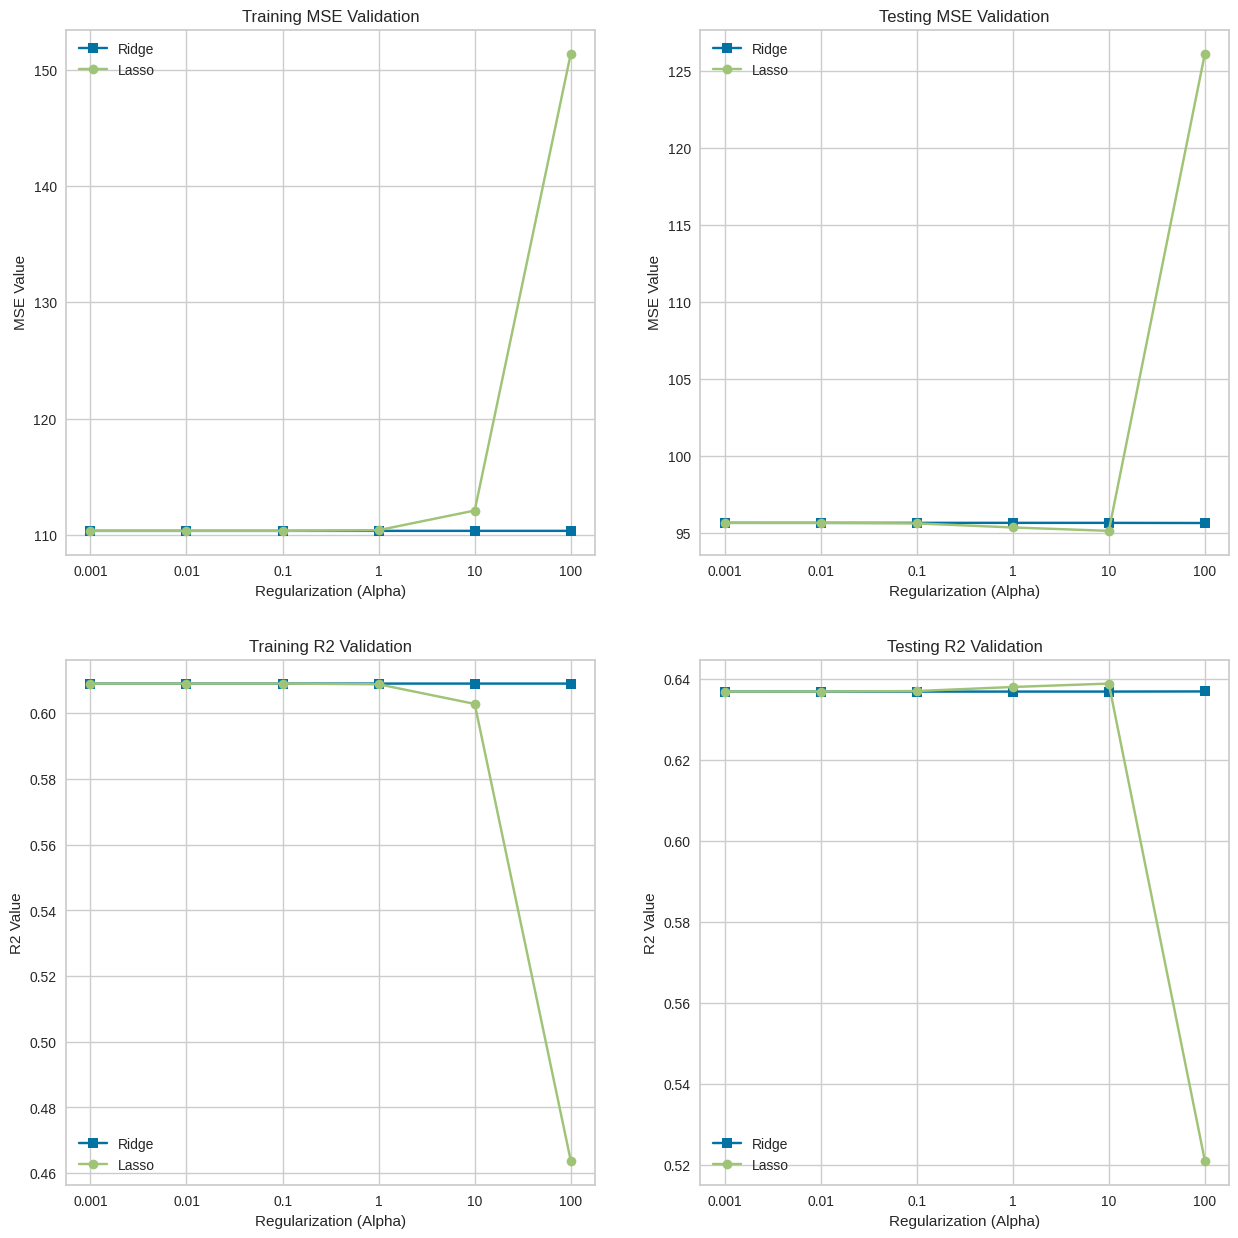

In [ ]:
# Import matplotlib and initialize figure
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))

# Plot training MSE Values for Ridge and Lasso models
plt.subplot(2, 2, 1)
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], T_MSE[0:6], label = 'Ridge', marker = 's')
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], T_MSE[6:12], label = 'Lasso', marker = 'o')
plt.title('Training MSE Validation')
plt.legend()
plt.xlabel('Regularization (Alpha)')
plt.ylabel('MSE Value')

# Plot testing MSE Values for Ridge and Lasso models
plt.subplot(2, 2, 2)
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], V_MSE[0:6], label = 'Ridge', marker = 's')
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], V_MSE[6:12], label = 'Lasso', marker = 'o')
plt.title('Testing MSE Validation')
plt.legend()
plt.xlabel('Regularization (Alpha)')
plt.ylabel('MSE Value')

# Plot training R2 Values for Ridge and Lasso models
plt.subplot(2, 2, 3)
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], T_R2[0:6], label = 'Ridge', marker = 's')
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], T_R2[6:12], label = 'Lasso', marker = 'o')
plt.title('Training R2 Validation')
plt.legend()
plt.xlabel('Regularization (Alpha)')
plt.ylabel('R2 Value')

# Plot testing R2 Values for Ridge and Lasso models
plt.subplot(2, 2, 4)
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], V_R2[0:6], label = 'Ridge', marker = 's')
plt.plot(['0.001', '0.01', '0.1', '1', '10', '100'], V_R2[6:12], label = 'Lasso', marker = 'o')
plt.title('Testing R2 Validation')
plt.legend()
plt.xlabel('Regularization (Alpha)')
plt.ylabel('R2 Value')

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

Answers:

The original training accuracy in part 2 of the assignment was 0.609071 while the testing accuracy was 0.636898.

The highest training Lasso R2 value (0.609071) was achieved when alpha was set to 0.001 or 0.01. The highest testing (validating) Lasso R2 value (0.638874) was achieved when alpha was set to 10. The best Lasso model for training accuracy was the same as the result from part 2 (0.609071) while the best Lasso model for testing accuracy was slightly higher at 0.638874 (compared to the original 0.636898).

The highest training Ridge R2 value (0.609071) was achieved when alpha was set to any logarithmic value between 0.001 and 100 (i.e. alpha had no effect). The highest testing (validating) Ridge R2 value (0.636937) was achieved when alpha was set to 100. Changes were very minor however. The best Ridge model for training accuracy was the same as the result from part 2 (0.609071) while the best Ridge model for testing accuracy was slightly higher at 0.636937 (compared to the original 0.636898).

While the results were able to be improved slightly through adjusting the alpha parameter using Lasso and Ridge models, the effects are not large enough where any of the models should be considered "good enough" in most scenarios. The R2 value should be as high as possible (hopefully above 90%). Most predictive models would not operate properly with an accuracy around 60%.



